# ADA 2018 - Homework 3



## Undestanding the StackOverflow community


Deadline: Nov 7th 2018, 23:59:59

Submission link: Check channel homework-3-public

StackOverflow is the most popular programming-related Q&A website. It serves as a platform for users to ask and answer questions and to vote questions and answers up or down. Users of StackOverflow can earn reputation points and "badges"; for example, a person is awarded 10 reputation points for receiving an "up" vote on an answer given to a question, and 5 points for the "up" vote on a question asked. Also, users receive badges for their valued contributions, which represents a kind of gamification of the traditional Q&A site. 

[Learn more about StackOverflow on Wikipedia](https://en.wikipedia.org/wiki/Stack_Overflow)

----

Dataset link:

https://drive.google.com/open?id=1POlGjqzw9v_pZ_bUnXGihOgk45kbvNjB

http://iccluster053.iccluster.epfl.ch/Posts.json.zip (mirror 1)

https://iloveadatas.com/datasets/Posts.json.zip (mirror 2)

Dataset description:

* **Id**: Id of the post
* **CreationDate**: Creation date of the post (String format)
* **PostTypeId**: Type of post (Question = 1, Answer = 2)
* **ParentId**: The id of the question. Only present if PostTypeId = 2
* **Score**: Points assigned by the users
* **Tags**: Tags of the question. Only present if PostTypeId = 1
* **Title**: Only present if PostTypeId = 1
* **ViewCount**: Only present if PostTypeId = 1

The dataset format is JSON. Here are examples of a question and an answer:

Question:
```json
{
    "Id": 10130734,
    "CreationDate": "2012-04-12T19:51:25.793+02:00",
    "PostTypeId": 1,
    "Score": 4,
    "Tags": "<python><pandas>",
    "Title": "Best way to insert a new value",
    "ViewCount": 3803
}
```

Answer:
```json
{  
   "CreationDate":"2010-10-26T03:19:05.063+02:00",
   "Id":4020440,
   "ParentId":4020214,
   "PostTypeId":2,
   "Score":1
}
```

----
Useful resources:

**Spark SQL, DataFrames and Datasets Guide**

https://spark.apache.org/docs/latest/sql-programming-guide.html

**Database schema documentation for the public data dump**

https://meta.stackexchange.com/questions/2677/database-schema-documentation-for-the-public-data-dump-and-sede

----

**Note:** Use Spark where possible. Some computations can take more than 10 minutes on a common notebook. Consider to save partial results on disk.

In [1]:
# Add your imports here
import pandas as pd
import numpy as np
import scipy as sp
from pyspark.sql import *
%matplotlib inline

In [2]:
import os
print(os.environ["JAVA_HOME"])
print(os.environ["SPARK_HOME"])
print(os.environ["PYTHONPATH"])

#example for data directory at notebook's directory
DATA_DIR = 'data/'

/Library/Java/JavaVirtualMachines/jdk1.8.0_191.jdk/Contents/Home
/opt/spark
/opt/spark/python:/opt/spark/python/lib/py4j-0.10.1-src.zip


In [3]:
spark = SparkSession.builder.getOrCreate()

## PRELUDE 
Dear reader, please the enjoy the journey accross the large range of functionalities that pyspark offers to data sceintist. 
Welcome to our journey throught the questions and answers posted on the stackoverflow webpage. 
Stack Overflow is a privately held website created in 2008 by Jeff Atwood and Joel Spolsky. It features questions and answers on a wide range of topics in computer programming. It was created to be a more open alternative to earlier question and answer sites such as Experts-Exchange. The name for the website was chosen by voting in April 2008 by readers of Coding Horror, Atwood's popular programming blog. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. 
This work was divided in 5 parts. The first part really focused on the data types and on the basic functionalities of pyspark. Task C and B were especiallly interesting on the statistical point of view since we have the oppornity to compute Pearson coefficent and so on. Task E, 

### Task A: Convert the dataset to a more convenient format
As a warm-up task (and to avoid to warm up your laptop too much), load the dataset into a Spark dataframe, show the content, and save it in the _Parquet_ format. Use this step to convert the fields to a more convenient form.

Answer the following questions:

1. How many questions have been asked on StackOverflow?
2. How many answers have been given?
3. What is the percentage of questions with a score of 0?

**Hint:** The next tasks involve a time difference. Consider storing time in numeric format.

In [4]:
# spark is an existing SparkSession
posts_df = spark.read.json(DATA_DIR + "posts.json")

# Displays the content of the DataFrame to stdout
posts_df.show()

+--------------------+-------+--------+----------+-----+--------------------+--------------------+---------+
|        CreationDate|     Id|ParentId|PostTypeId|Score|                Tags|               Title|ViewCount|
+--------------------+-------+--------+----------+-----+--------------------+--------------------+---------+
|2010-10-26T03:17:...|4020437|    null|         1|    0|<asp.net-mvc><jqu...|display jquery di...|      510|
|2010-10-26T03:18:...|4020438|    null|         1|    0|<javascript><html...|Why can only my m...|       62|
|2010-10-26T03:19:...|4020440| 4020214|         2|    1|                null|                null|     null|
|2010-10-26T03:19:...|4020441| 3938154|         2|    0|                null|                null|     null|
|2010-10-26T03:20:...|4020443| 4020419|         2|  324|                null|                null|     null|
|2010-10-26T03:20:...|4020444| 4020433|         2|    0|                null|                null|     null|
|2010-10-26T03:21:.

#### Show the name and type of the columns in the DataFrame

In [5]:
posts_df.printSchema()
posts_df.dtypes

root
 |-- CreationDate: string (nullable = true)
 |-- Id: long (nullable = true)
 |-- ParentId: long (nullable = true)
 |-- PostTypeId: long (nullable = true)
 |-- Score: long (nullable = true)
 |-- Tags: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- ViewCount: long (nullable = true)



[('CreationDate', 'string'),
 ('Id', 'bigint'),
 ('ParentId', 'bigint'),
 ('PostTypeId', 'bigint'),
 ('Score', 'bigint'),
 ('Tags', 'string'),
 ('Title', 'string'),
 ('ViewCount', 'bigint')]

In [6]:
posts_df.describe().show()

+-------+--------------------+--------------------+--------------------+------------------+------------------+--------------------+--------------------+------------------+
|summary|        CreationDate|                  Id|            ParentId|        PostTypeId|             Score|                Tags|               Title|         ViewCount|
+-------+--------------------+--------------------+--------------------+------------------+------------------+--------------------+--------------------+------------------+
|  count|            40839832|            40839832|            25192772|          40839832|          40839832|            15647060|            15647060|          15647060|
|   mean|                null| 2.581864625658712E7| 2.337855096310124E7| 1.616867669778857| 2.405349267842238|                null|                null| 2053.396033376238|
| stddev|                null|1.5125600166357936E7|1.5155757874314353E7|0.4861501347809169|20.823425070131528|                null|         

Dataset can be constructed from JVM objects and then manipulated using functional transformations (map, flatMap, filter, etc.). One of most common transformation operations in Spark, and the MapReduce model in general, is map, which applies a function to the elements of an RDD and returns an RDD with the results. Here we will use the map functions to convert the files to a more convenient form. 

In [7]:
## Show the data formats that are stored in the spark dataframe
posts_df.printSchema()

root
 |-- CreationDate: string (nullable = true)
 |-- Id: long (nullable = true)
 |-- ParentId: long (nullable = true)
 |-- PostTypeId: long (nullable = true)
 |-- Score: long (nullable = true)
 |-- Tags: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- ViewCount: long (nullable = true)



In [8]:
print("There are ", posts_df.count(), " rows in the pyspark dataframe")

There are  40839832  rows in the pyspark dataframe


### Convert the field types in to more coherent / optimized types : 

In [9]:
### Convert the string time to Timestamp type 
from pyspark.sql.functions import unix_timestamp, from_unixtime, from_utc_timestamp

#The targetted data format is : 2010-10-26T03:17:55.603+02:00
posts_df = posts_df.withColumn('timestamp', from_utc_timestamp(posts_df.CreationDate, "PST"))
posts_df = posts_df.withColumn("PostTypeId", posts_df["PostTypeId"].cast("int"))
posts_df = posts_df.withColumn("Score", posts_df["Score"].cast("int"))
posts_df = posts_df.withColumn("ViewCount", posts_df["ViewCount"].cast("int"))
posts_df.printSchema()

root
 |-- CreationDate: string (nullable = true)
 |-- Id: long (nullable = true)
 |-- ParentId: long (nullable = true)
 |-- PostTypeId: integer (nullable = true)
 |-- Score: integer (nullable = true)
 |-- Tags: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- ViewCount: integer (nullable = true)
 |-- timestamp: timestamp (nullable = true)



#### COMMENT

Our group decide to only change the type of the date. The **CreationDate** type needed to be casted to a timestamp value in order to ease the computations made afterwards in the code. However, we decide to not modify the other data since we did not had the impression that it would make our life easier afterwards and that we would only increase the since of the data vector. Indeed, **Id** is Id of the post and could without any problem stay long int typed. Long int are coded on 8 bytes which is 64 bits. This means that we can code $2^{64}$ numbers. Here it could make sens to keep the data encoded as a long int since each post needs its own unique Id. However, for the **Score**, **PostTypeId** and **ViewCount**, we decided to convert this data to stansdart intergers since it makes no sense to waste space in memory for these variable which will never overflow. The **Title** and **Tags** were kept as strings. 

In [10]:
#save the data in the indicated format. DataFrames can be saved as Parquet files, maintaining the schema information.
posts_df.write.parquet(DATA_DIR + "posts.parquet", mode = "overwrite")

### 1 - How many questions have been asked on StackOverflow? 
**ANSWER**: We need to consider only the posts of postType = 1 and then to count them. 

In [11]:
posts_df_questions = posts_df.filter(posts_df['PostTypeId']  == 1)
print('Q1: There have been ', posts_df_questions.count(), "question asked.")

Q1: There have been  15647060 question asked.


### 2 - How many answers have been given? 
**ANSWER**: We need to consider only the fields with postType = 2 and then to count them. 

In [12]:
posts_df_answers = posts_df.filter(posts_df['PostTypeId']  == 2)
print('Q2: There have been ', posts_df_answers.count(), " given answers.")

Q2: There have been  25192772  given answers.


### 3 - What is the percentage of questions with a score of 0? 
**ANSWER**: We need to add an additional filter criteria which is the fact to "answer by 0" then we can divide the subgroup by the value we got in questions 1.

In [13]:
posts_df_question_score_0 = posts_df_questions.filter(posts_df['score'] == 0)
print("Q3: The percentage of of questions with a score of 0 is ", 100*posts_df_question_score_0.count() / posts_df_questions.count(), ' %')

Q3: The percentage of of questions with a score of 0 is  46.54365740273253  %


**Hint:** Load the dataset from the Parquet file for the next tasks.

### Load the dataset from .parquet format for the next questions

In [14]:
posts_parquet = spark.read.parquet( DATA_DIR + "posts.parquet")
test_df = posts_parquet
type(test_df)

pyspark.sql.dataframe.DataFrame

### Task B: What are the 10 most popular tags?

What are the most popular tags in StackOverflow? Use Spark to extract the information you need, and answer the following questions with Pandas and Matplotlib (or Seaborn):

1. What is the proportion of tags that appear in fewer than 100 questions?
2. Plot the distribution of the tag counts using an appropriate representation.
3. Plot a bar chart with the number of questions for the 10 most popular tags.

For each task describe your findings briefly.

In [15]:
##PART A : Clean & Count the tags 
data_with_tags = test_df.filter(test_df.PostTypeId==1) # make the computation only when necessary (e.g. when it is a question)
data_with_tags_rdd = data_with_tags.rdd #convert to RDD in order to apply map functions

#flatMap and reduceByKey
import re 
genres_rdd = data_with_tags_rdd.flatMap(lambda r: [re.sub('[><]', '', g) for g in r[5].split('><')])
genre_frequency = genres_rdd.map(lambda r: (r,1)).reduceByKey(lambda a,b: a+b) #count the reccurence of a given tag

### What is the proportion of tags that appear in fewer than 100 questions?
To answer this question we needed to make a dictionary of the tags and to counts these tags as soons as they appeared to the vector. 

In [16]:
less_than_100  = genre_frequency.filter(lambda k : k[1] < 100)
print('There are ', less_than_100.count(), 'tags that appear in fewer than 100 questions')

There are  36025 tags that appear in fewer than 100 questions


### Plot the distribution of the tag counts using an appropriate representation.
In order to find the right representation our group decided to take the boxplot as a reference to assess the distribution of the data. Here we can see that we are in a similar case than in the previous homework. This means that we have many outliers on the left of the distribution. 

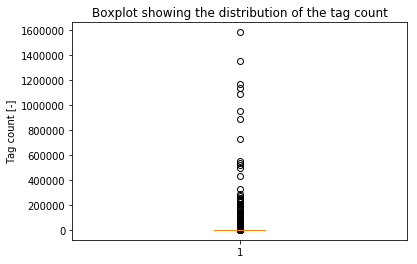

In [17]:
import matplotlib.pyplot as plt

#sort in decreasing order 
Sorted = genre_frequency.sortBy(lambda a: a[1],  False)

tag_count = [x[1] for x in genre_frequency.collect()]

plt.boxplot(tag_count)
plt.ylabel('Tag count [-]')
plt.title('Boxplot showing the distribution of the tag count')
plt.show()

In [18]:
d = {'data' :tag_count}
tmp = pd.DataFrame(data = d)
tmp.describe()

,data
count,5.299400e+04
mean,8.809450e+02
std,1.598885e+04
min,1.000000e+00
25%,1.000000e+01
50%,3.700000e+01
75%,1.570000e+02
max,1.585495e+06


#### COMMENT: 
Please find above the relevant statistics about the tag count. These data confirm that we have a right tailed dataset. 

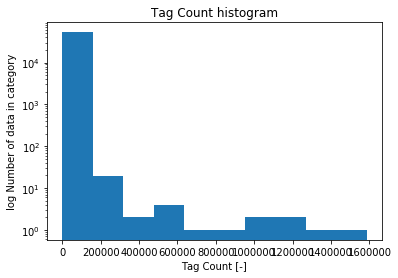

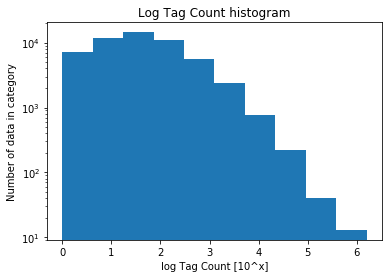

In [19]:
plt.hist(tag_count, log=True)
plt.xlabel('Tag Count [-]')
plt.ylabel('log Number of data in category')
plt.title('Tag Count histogram')
plt.show()

plt.hist(np.log10(tag_count), log=True)
plt.xlabel('log Tag Count [10^x]')
plt.ylabel('Number of data in category')
plt.title('Log Tag Count histogram')
plt.show()

#### COMMENT : 
We decided to make an histogram to represent the tag count representation. This is because a histogram is a plot that lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data. In this case and as shown by the histograms we can see that our distribution follows a power law. 

### Plot a bar chart with the number of questions for the 10 most popular tags.

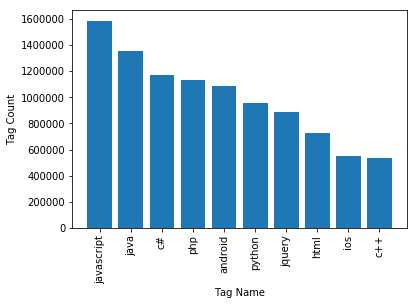

In [20]:
name = [x[0] for x in Sorted.collect()[0:10]]
count = [x[1] for x in Sorted.collect()[0:10]]

plt.bar(name, count)
plt.xlabel('Tag Name')
plt.ylabel('Tag Count')
plt.xticks(rotation = 'vertical')
plt.show()

#### COMMENT: 
We can see that the most recurrent tag is the javascript with a bit less than 1600000 apparitions. The precise count is given by: 

In [21]:
Sorted.collect()[0:10]

[('javascript', 1585495),
 ('java', 1352735),
 ('c#', 1172492),
 ('php', 1136082),
 ('android', 1088811),
 ('python', 954401),
 ('jquery', 886982),
 ('html', 725289),
 ('ios', 551843),
 ('c++', 536267)]

### Task C: View-score relation

We want to investigate the correlation between the view count and the score of questions.

1. Get the view count and score of the questions with tag ```random-effects``` and visualize the relation between these two variables using an appropriate plot.
2. Are these two variables correlated? Use the Pearson coefficient to validate your hypothesis. Discuss your findings in detail.

**Hint:** Inspect the data visually before drawing your conclusions.

### C.1.1 - Load the Data 

In [22]:
### Convert the string time to Timestamp type 
from pyspark.sql.functions import unix_timestamp, from_unixtime, from_utc_timestamp

# Load & Read parquet file
posts_parquet = spark.read.parquet( DATA_DIR + "posts.parquet")

# test if the data was uploaded correctly 
posts_parquet.printSchema()

root
 |-- CreationDate: string (nullable = true)
 |-- Id: long (nullable = true)
 |-- ParentId: long (nullable = true)
 |-- PostTypeId: integer (nullable = true)
 |-- Score: integer (nullable = true)
 |-- Tags: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- ViewCount: integer (nullable = true)
 |-- timestamp: timestamp (nullable = true)



#### C.1.2 - Data Processing 
To archieve the demanded task we decided to extract the score, viewcount and tags column from the initial sparkdataframe. In a second setp we decide to keep only the cells that are containing the "random-effects" tag. 

In [23]:
# Select the usefull columns
posts_parquet_selected = posts_parquet[['Score','ViewCount','Tags']]
# Select all the tags containing 'random-effects'
posts_parquet_selected = posts_parquet_selected[posts_parquet_selected.Tags.contains('random-effects')]
# Print the resulting data
posts_parquet_selected.show()

+-----+---------+--------------------+
|Score|ViewCount|                Tags|
+-----+---------+--------------------+
|    0|       12|<statistics><regr...|
|    0|      495|<r><plm><random-e...|
|    0|      220|<r><nlme><random-...|
|    0|       21|    <random-effects>|
|    5|      126|<r><nlme><random-...|
|   -1|       61|<r><lme4><random-...|
|    0|      196|<r><loops><linear...|
|    1|      131|<r><ggplot2><logi...|
|    2|      487|<r><lme4><multi-l...|
|    0|      699|<sas><simulation>...|
|    0|       12|<logistic-regress...|
|    4|      125|<statistics><lme4...|
|    1|      211|<r><statistics><s...|
|    2|      495|<jags><winbugs><r...|
|    2|       76|<r><sas><anova><m...|
|    0|       81|<r><mixed-models>...|
|    0|       10|<regression><pane...|
|    0|       47|<r><replication><...|
|    1|      145|<r><nlme><random-...|
|    0|       14|<cox-regression><...|
+-----+---------+--------------------+
only showing top 20 rows



In [24]:
# Check the shape
print("The tag random-effects appears ", posts_parquet_selected.count(), " times in the dataset that we observed")

The tag random-effects appears  100  times in the dataset that we observed


#### C.1.3 - Data Analysis 

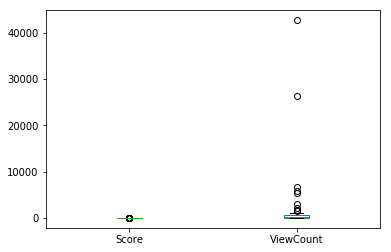

In [25]:
# As the selected data is small, we transfer it to pandas to plot it easily
df = posts_parquet_selected.toPandas()
# We select the two variables of interest
df = df[['Score', 'ViewCount']]
df.plot.box()

**COMMENT**: 
We decided to make a boxplot from the start in order to have a borad idea about the underlying distribution of our two columns being the Score and the ViewCount. As we can see, we are once again in a case where the data contains a lot of right outliers and whereas the median and the quantiles are pretty close to each other.

Text(0.5,1,'Pairplot showing the relation between the Score and the ViewCount under different perspectives')

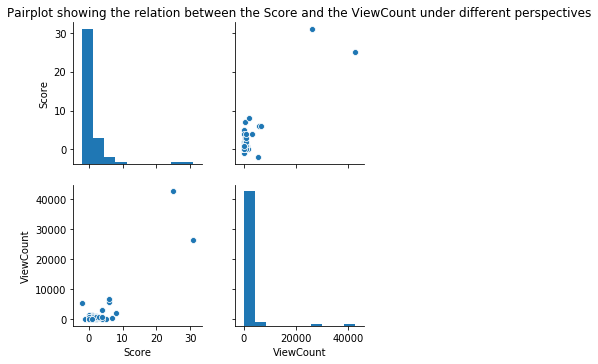

In [26]:
# Create the default pairplot
import seaborn as sns

sns.pairplot(df)
plt.title('Pairplot showing the relation between the Score and the ViewCount under different perspectives')

**COMMENT**:  
The pairplot (or scatter plot to be more general) make it possible to asses the linear correlation between two variables. As we can see from the plot there no obvious linear relationship between the vairable at the first sight since we do not see points distributed around the x = y line. As already shown in the boxplot, we can see that the major part of the data is located at the left of the distribution for boths variables. However, a few outliers could be recognized as shown on the figure bellow in red.  

### Define how Outliers are Determined in Statistics
Multiplying the interquartile range (IQR) by 1.5 (weak outliers) and 3.0 (strong outliers) will give us a way to determine whether a certain value is an outlier. If we subtract 3 x IQR from the first quartile, any data values that are less than this number are considered outliers. Similarly, if we add 3 x IQR to the third quartile, any data values that are greater than this number are considered outliers.

In [27]:
df.describe()

,Score,ViewCount
count,100.000000,100.000000
mean,1.500000,1191.830000
std,4.154832,5037.166977
min,-2.000000,10.000000
25%,0.000000,64.250000
50%,0.000000,179.000000
75%,1.000000,534.000000
max,31.000000,42678.000000


In [28]:
IQR = 534.000000 - 64.250000
low_outlier = max(0, 64.250000 - 3*IQR)
high_outlier = 534 + 3*IQR 

print( "The data point is considered as being an outlier if it is outside of this interval: [", low_outlier , high_outlier, ']')

The data point is considered as being an outlier if it is outside of this interval: [ 0 1943.25 ]


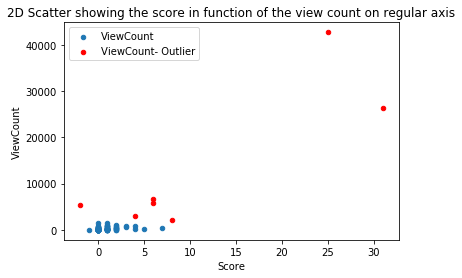

In [29]:
df_no_outliers = df[df.ViewCount < high_outlier]
df_out_outliers = df[df.ViewCount > high_outlier]
ax =  df_no_outliers.plot.scatter(x='Score', y='ViewCount', label = 'ViewCount')
df_out_outliers.plot.scatter(x='Score', y='ViewCount', ax=ax, color='red', label = 'ViewCount- Outlier')
plt.title('2D Scatter showing the score in function of the view count on regular axis')
plt.show()

**COMMENT**: 
From this plot we can see that, generally speaking there is a weak positive relation possibly linear relation between both variables as we can see from the plot above. In part C.2.1, the Pearson and Spearman tests will give us more details about the nature of the relationship between both variables. 

### Additional Graphs on non-linear relations between both variables 

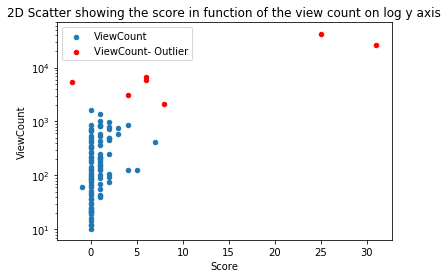

In [30]:
ax =  df_no_outliers.plot.scatter(x='Score', y='ViewCount', label = 'ViewCount', logy=True)
df_out_outliers.plot.scatter(x='Score', y='ViewCount', ax=ax, color='red', label = 'ViewCount- Outlier', logy =True)
plt.title('2D Scatter showing the score in function of the view count on log y axis')
plt.show()

**Spearman’s Rank Correlation**: 
Two variables may be related by a nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables.

Pearson correlation coefficient :               Score  ViewCount
Score      1.000000   0.463951
ViewCount  0.463951   1.000000


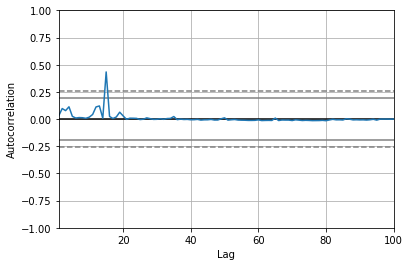

In [31]:
pd.plotting.autocorrelation_plot(df) #considering the outliers 
print('Pearson correlation coefficient :', df.corr(method='spearman'))

Pearson correlation coefficient :              Score  ViewCount
Score      1.00000    0.39887
ViewCount  0.39887    1.00000


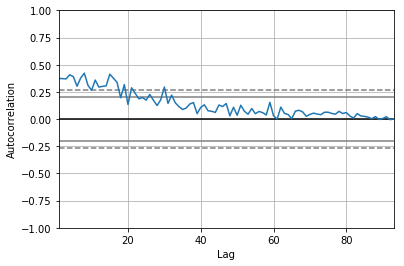

In [32]:
pd.plotting.autocorrelation_plot(df_no_outliers) #ignoring the outliers 
print('Pearson correlation coefficient :', df_no_outliers.corr(method='spearman'))

**COMMENT**: From the spearman relation we can see that, since it is bellow 0.5, there is a notable non-linear correlation between both values. This is confirmed by the semilog scatter plot that we implemented. 

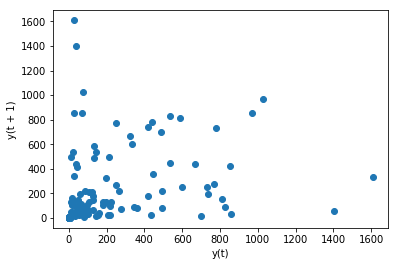

In [33]:
pd.plotting.lag_plot(df[df.ViewCount < high_outlier])

**COMMENT**: 
Creating a lag plot enables you to check for randomness. Random data will spread fairly evenly both horizontally and vertically. If you cannot see a pattern in the graph, the data is most probably random. Which here is not excliuded in this case. 

#### C.2.1 - Determine the Pearson Correlation 
The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples. The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2452dda0>,
      dtype=object)

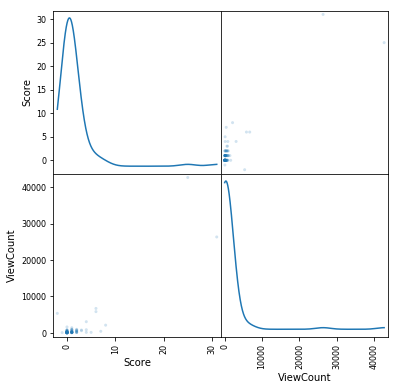

In [34]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

**COMMENT** : 
The scater matrix is a pair-wise scatter plot of several variables presented in a matrix format. It can be used to determine whether the variables are correlated and whether the correlation is positive or negative. Here we can see that the seems to be a correlation between the data for the low score values as can be seen in the top left pannel. 

Pearson correlation coefficient :               Score  ViewCount
Score      1.000000   0.882197
ViewCount  0.882197   1.000000


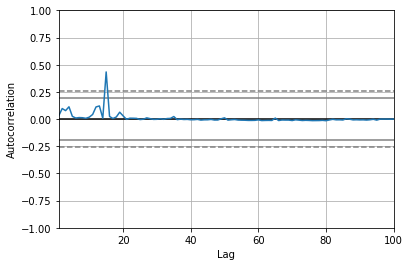

In [35]:
pd.plotting.autocorrelation_plot(df)
print('Pearson correlation coefficient :', df.corr(method='pearson'))

Pearson correlation coefficient :               Score  ViewCount
Score      1.000000   0.236455
ViewCount  0.236455   1.000000


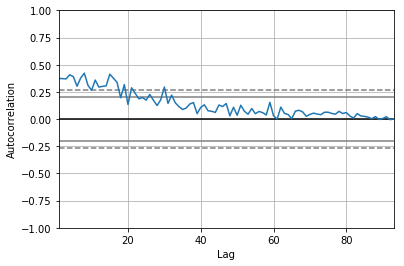

In [36]:
pd.plotting.autocorrelation_plot(df_no_outliers)
print('Pearson correlation coefficient :', df_no_outliers.corr(method='pearson'))

**COMMENT**: 
During this section C, we implemented various different techniques in order to assess how our data is related. In a first step, we looked at the distribution under different scales in order to assess visually want could be the relation between the variables. In a second times, we used the statisical definition of a strong outlier in order to remove un-consistent data for the corralation assment. This data is still interesting to answer to other questions. Finally, we used the Pearson and the Spearman correlation to assess whether the relation between both variables is linear, respectively non-linear. We obtained a Pearson coefficient of 0.23 for the cleaned data which indicate a low linear relationship between the variables. The  spearman rank correlation between the variables gave the same answer regarding the non-linear relation between both varaibles. Finally, we used a lag plot which could be a measure of random relationship between the data. For the non-outlier population of the data the random relationship could not be excluded. 

### Task D: What are the tags with the fastest first answer?

What are the tags that have the fastest response time from the community? We define the response time as the difference in seconds between the timestamps of the question and of the first answer received.

1. Get the response time for the first answer of the questions with the tags ```python``` and ```java```.
2. Plot the two distributions in an appropriate format. What do you observe? Describe your findings and discuss the following distribution properties: mean, median, standard deviation.
3. We believe that the response time is lower for questions related to Python (compare to Java). Contradict or confirm this assumption by estimating the proper statistic with bootstrapping. Visualize the 95% confidence intervals with box plots and describe your findings.
3. Repeat the first analysis (D1) by using the proper statistic to measure the response time for the tags that appear at least 5000 times. Plot the distribution of the 10 tags with the fastest response time.


In [37]:
from pyspark.sql.functions import col, min as min_, mean
from pyspark.sql import functions as F
import random

# We define the structure of our time date variable
timeFmt = "yyyy-MM-dd'T'HH:mm:ss.SSS"

#### D.1 : Get the response time for the first answer of the questions with the tags python and java :

In [38]:
# Load the files
posts_parquet = spark.read.parquet( DATA_DIR + "posts.parquet")

# Select usefull columns
posts_parquet_selected = posts_parquet[['CreationDate','Id','PostTypeId','Tags','ParentId']]

# Separate python tags and java tags
posts_parquet_python = posts_parquet_selected[posts_parquet_selected.Tags.contains('<python>')]
posts_parquet_java = posts_parquet_selected[posts_parquet_selected.Tags.contains('<java>')]

# Print the two different DataFrame and check the shape
posts_parquet_python.show()
posts_parquet_java.show()
print('Python shape :',(posts_parquet_python.count(), len(posts_parquet_python.columns)))
print('Java shape :',(posts_parquet_java.count(), len(posts_parquet_java.columns)))

+--------------------+--------+----------+--------------------+--------+
|        CreationDate|      Id|PostTypeId|                Tags|ParentId|
+--------------------+--------+----------+--------------------+--------+
|2017-08-17T16:21:...|45740358|         1|<python><websocke...|    null|
|2017-08-17T16:25:...|45740445|         1|<python><python-2.7>|    null|
|2017-08-17T16:29:...|45740537|         1|<python><pandas><...|    null|
|2017-08-17T16:37:...|45740682|         1|<python><macos><h...|    null|
|2017-08-17T16:39:...|45740714|         1|<python><flask><f...|    null|
|2017-08-17T16:40:...|45740730|         1|<python><apache-s...|    null|
|2017-08-17T16:41:...|45740750|         1|<python><mysql><ssh>|    null|
|2017-08-17T16:42:...|45740776|         1|      <java><python>|    null|
|2017-08-17T16:44:...|45740794|         1|<python><ironpython>|    null|
|2017-08-17T16:44:...|45740804|         1|<python><c++><uni...|    null|
|2017-08-17T16:45:...|45740829|         1|      <py

In [39]:
# Creation of the question time feature for both category
question_time_python = posts_parquet_python.selectExpr("CreationDate as DepartureDate",'PostTypeId as PostTypeId', 'Id as Id')
question_time_java = posts_parquet_java.selectExpr("CreationDate as DepartureDate",'PostTypeId as PostTypeId', 'Id as Id')

# Reloading of the raw data to select the answers corresponding to the tags 
posts_parquet = spark.read.parquet( DATA_DIR + "posts.parquet")
posts_parquet = posts_parquet.withColumn('timestamp', from_utc_timestamp(posts_parquet.CreationDate, "PST"))

# Select usefull columns
posts_parquet_selected = posts_parquet[['CreationDate','ParentId','PostTypeId','Tags']]

# We groupby parentID to have all the answers corresponding to the same question and we select the more older one (so the first answer) with min function on timestamp type. 
first_answer_date = posts_parquet_selected[posts_parquet_selected.PostTypeId == 2].groupBy("ParentId").agg(min_("CreationDate").alias("FirstAnswerDate"))

# Again we select the columns of interest
first_answer_date = first_answer_date.selectExpr("ParentId as Id",'FirstAnswerDate as FirstAnswerDate')

# We check the shape of all the first answer selection 
print('Fisrt Answer selection shape :', (first_answer_date.count(), len(first_answer_date.columns)))

Fisrt Answer selection shape : (14186282, 2)


#### Python Tag

In [40]:
# We join the file corresponding to the questions with the file corresponding to the answer using ID and IDParent columns
new_df_python = question_time_python.join(first_answer_date, on = ['Id'])
# We create the ResponseTime feature by finding the difference of time between question and answer.
new_df_python = new_df_python.withColumn('ResponseTime', (F.unix_timestamp('FirstAnswerDate', format=timeFmt) 
                                                                                                        - F.unix_timestamp('DepartureDate', format=timeFmt)))
new_df_python.show()
print('Python Response Time shape', (new_df_python.count(), len(new_df_python.columns)))

+------+--------------------+----------+--------------------+------------+
|    Id|       DepartureDate|PostTypeId|     FirstAnswerDate|ResponseTime|
+------+--------------------+----------+--------------------+------------+
| 39104|2008-09-02T09:40:...|         1|2008-09-02T11:43:...|        7399|
| 92620|2008-09-18T13:41:...|         1|2008-09-18T15:06:...|        5089|
|116139|2008-09-22T17:08:...|         1|2008-09-22T17:16:...|         511|
|181556|2008-10-08T06:34:...|         1|2008-10-08T06:46:...|         756|
|227928|2008-10-22T23:38:...|         1|2008-10-22T23:40:...|         116|
|447117|2009-01-15T15:15:...|         1|2009-01-15T15:19:...|         217|
|472575|2009-01-23T11:16:...|         1|2009-01-23T11:23:...|         397|
|474373|2009-01-23T20:23:...|         1|2009-01-23T20:36:...|         754|
|516039|2009-02-05T14:11:...|         1|2009-02-05T14:17:...|         367|
|620154|2009-03-06T19:44:...|         1|2009-03-06T19:53:...|         529|
|651048|2009-03-16T16:00:

#### Java Tag 

In [41]:
# We join the file corresponding to the questions with the file corresponding to the answer using ID and IDParent columns
new_df_java = question_time_java.join(first_answer_date, on = ['Id'])
# We create the ResponseTime feature by finding the difference of time between question and answer.
new_df_java = new_df_java.withColumn('ResponseTime', (F.unix_timestamp('FirstAnswerDate', format=timeFmt) 
                                            - F.unix_timestamp('DepartureDate', format=timeFmt)))
new_df_java.show()
print('Java Response Time shape', (new_df_java.count(), len(new_df_java.columns)))

+------+--------------------+----------+--------------------+------------+
|    Id|       DepartureDate|PostTypeId|     FirstAnswerDate|ResponseTime|
+------+--------------------+----------+--------------------+------------+
| 30428|2008-08-27T15:21:...|         1|2008-08-27T15:53:...|        1922|
| 37310|2008-09-01T00:40:...|         1|2008-09-01T00:47:...|         439|
| 55709|2008-09-11T02:40:...|         1|2008-09-11T02:45:...|         290|
| 79662|2008-09-17T03:29:...|         1|2008-09-17T03:31:...|         156|
|112603|2008-09-22T00:01:...|         1|2008-09-22T00:52:...|        3076|
|132353|2008-09-25T09:41:...|         1|2008-09-25T10:02:...|        1258|
|191998|2008-10-10T15:53:...|         1|2008-10-10T16:04:...|         666|
|203677|2008-10-15T03:53:...|         1|2008-10-15T04:45:...|        3099|
|241185|2008-10-27T19:48:...|         1|2008-10-27T23:19:...|       12680|
|325443|2008-11-28T10:24:...|         1|2008-11-28T10:26:...|         146|
|327408|2008-11-29T10:23:

In [42]:
# Convert to DataFrame to create the plot as in the tutorial by taking just the columns of interest
new_df_python = new_df_python.selectExpr("ResponseTime as ResponseTime")
new_df_python = new_df_python.toPandas()
new_df_java = new_df_java.selectExpr("ResponseTime as ResponseTime")
new_df_java = new_df_java.toPandas()

Here is a resume the key points of our procedure :
    - We select all the answers containing the two tags of interest thanks to the function contains(). 
    - Thanks to that we create the features corresponding to the question time and date for both tags.
    - Then we select all the answers and thanks to groupby and min we keep only the first answer per ParentID.
    - To conclude, we join questions and answer dataframe by looking at ID and by susbtract the two date we find the response time.

### PART D.2 : 
Plot the two distributions in an appropriate format. What do you observe? Describe your findings and discuss the following distribution properties: mean, median, standard deviation : 

### Clean Data 
We decide to remove the time intervals that are smaller than 0 since it is impossible to answer a question before it was even asked. 

In [43]:
new_df_python_deleted = new_df_python[new_df_python.ResponseTime <= 0]
new_df_java_deleted = new_df_java[new_df_java.ResponseTime <= 0]

new_df_python_cleaned = new_df_python[new_df_python.ResponseTime > 0]
new_df_java_cleaned = new_df_java[new_df_java.ResponseTime > 0]

In [44]:
print("The amount of data for the python that was removed is : ", len(new_df_python_deleted))
print("The amount of data for the java that was removed is : ", len(new_df_java_deleted))

The amount of data for the python that was removed is :  2312
The amount of data for the java that was removed is :  2252


In [91]:
##Remove the outliers 
Q1_java = np.quantile(new_df_java_cleaned, 0.25)
Q3_java = np.quantile(new_df_java_cleaned, 0.75)
new_df_java_cleaned = new_df_java_cleaned[new_df_java_cleaned.ResponseTime < Q3_java + 3*(Q3_java - Q1_java)]

##Remove the outliers 
Q1_python = np.quantile(new_df_python_cleaned, 0.25)
Q3_python = np.quantile(new_df_python_cleaned, 0.75)
new_df_python_cleaned = new_df_python_cleaned[new_df_python_cleaned.ResponseTime < Q3_python + 3*(Q3_python - Q1_python)]

**COMMENT** : 
The entire python dataframe contains 830160 rows, removing 2312 cells does not affect the distribution that we have. For the java dataframe we can draw the same conclusions : The original java dataframe contained 1179070 entries and 2252 of then were removed which is less than 1%. 

### Analyse Data

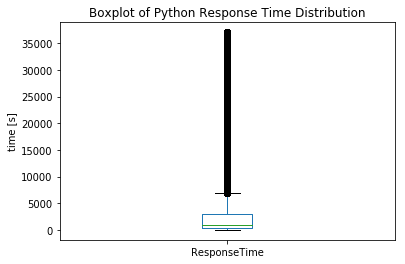

In [92]:
new_df_python_cleaned.plot.box()
plt.title('Boxplot of Python Response Time Distribution')
plt.ylabel('time [s]')
plt.show()

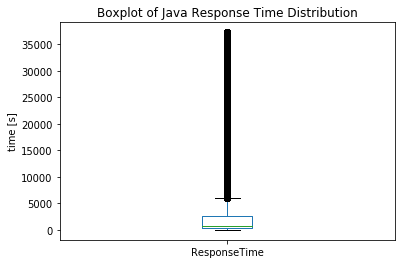

In [93]:
new_df_java_cleaned.plot.box()
plt.title('Boxplot of Java Response Time Distribution')
plt.ylabel("time [s]")
plt.show()

In [47]:
new_df_python_cleaned.describe()

,ResponseTime
count,8.278480e+05
mean,9.837171e+05
std,6.908426e+06
min,1.000000e+00
25%,4.250000e+02
50%,1.357000e+03
75%,9.583000e+03
max,2.464575e+08


In [48]:
new_df_java_cleaned.describe()

,ResponseTime
count,1.176818e+06
mean,9.988755e+05
std,7.133064e+06
min,1.000000e+00
25%,3.960000e+02
50%,1.224000e+03
75%,9.615000e+03
max,2.985367e+08


**COMMENT** : 
From the boxplots of the two distributions, we are in a good position to talk about the distribution of the mean, median and standart deviation. We can see that, like in the previous homeword, the median would not describe the distributions accurately since they are hugely shifted to the right. This makes the median a better way to descrive the "average" behavior of the population since the median is robust to outliers.Since there are so many outliers the standart deviation is also huge. using the quartiles would be a better measure of how "spread" the data is. Furthermore, we decide to remove the strong outliers from the data since it was making the lecture of the histograms too difficult (An extreme outlier is $Q3 + 3*(Q3-Q1)$. 

### PART D.3 : 
We believe that the response time is lower for questions related to Python (compare to Java). Contradict or confirm this assumption by estimating the proper statistic with bootstrapping. Visualize the 95% confidence intervals with box plots and describe your findings :

In [49]:
def bootstrapping(distribution, percentage, number_of_bootstrapping):
    '''
    Allows the random sampling with repacement of the distribution given as input and return a list of mean corresponding to each resampling experiment.
    Inputs :
        - distribution : List of integer corresponding to the response time.
        - percentage : Float number corresponding to the percentage of the dataset you want to resample. It define indirectly the resample size.
        - number_of_bootstrapping : Integer number corresponding to number of resampling we will do.
    Output :
        - mean_list : List of float number where each element correspond to the mean of one experience of resampling. 
    '''
    mean_list=[]
    for i in range (number_of_bootstrapping) :
        # Create an array of random numbers allowing us to select random index
        random_tab = random.sample(range(1,distribution.index.max()), int(distribution.shape[0]*percentage))
        # Adding to a list the mean of the sample of the distribution
        mean_list.append(distribution[distribution.index.isin(random_tab)].median())
    return mean_list

In [50]:
# We create a dataframe to save the output of the bootstrap process :
median_list = pd.DataFrame(columns = ['Median_python','Median_java'])

# We use our Bootstrap function
median_list['Median_python'] = bootstrapping(new_df_python, 0.3, 500)
median_list['Median_java'] = bootstrapping(new_df_java, 0.3, 500)
median_list['Median_python'] = median_list['Median_python'].astype(float)
median_list['Median_java'] = median_list['Median_java'].astype(float)

# We display the caracteristic of the two Bootstrap distribution :
median_list.describe(include='all')

,Median_python,Median_java
count,500.000000,500.000000
mean,1346.921000,1217.746000
std,6.155082,4.805379
min,1329.000000,1204.000000
25%,1343.000000,1214.000000
50%,1347.000000,1218.000000
75%,1351.000000,1221.000000
max,1363.000000,1230.000000


In [51]:
# We ran a t-test and find the p value to see if we contradict the null hypothesis
import scipy.stats

t_value = sp.stats.ttest_rel(median_list['Median_python'], median_list['Median_java'] )
print(t_value)

Ttest_relResult(statistic=363.8547250343127, pvalue=0.0)


**COMMENT** : 
We decided to use the median for the bootstraping since we concluded from the question above that it is the most robust measure for the kind of distribution that we are looking at. 
To validate the hypothesis, we first compute the characteristics of each series of the bootstrap distribution. The interval of **confidence is 0.95**. The Scipy ttes_ind function returns a tuple made of t-statistic and the p-value. Hence, we can observe that the p_value of this two-sided test for the null hypothesis that the 2 independent samples have identical average (expected) values is **p_value=0.0**. The bootstrap is resampling each time **30 percent** of the all dataset and is repeated **500 times**. Thus, we can reject with ANY alpha the null hypothesis that the average of the reponse time for python and java question is the same. The belief that the response time is lower for questions related to Python (compare to Java) is true.

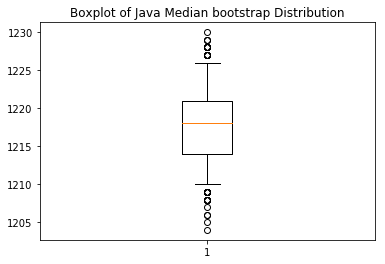

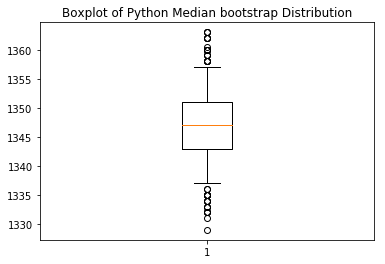

In [52]:
list_java = median_list['Median_java']
list_python = median_list['Median_python']

plt.boxplot(list_java, whis=[5, 95])
plt.title('Boxplot of Java Median bootstrap Distribution')
plt.show()

plt.boxplot(list_python, whis=[5, 95])
plt.title('Boxplot of Python Median bootstrap Distribution')
plt.show()

### PART D.4 

#### Task A: Take the tags used in more than 5000 questions 

In [53]:
more_than_5000  = genre_frequency.filter(lambda k : k[1] > 5000)
more_than_5000 = more_than_5000.toDF()
more_than_5000 = more_than_5000.toPandas()

In [ ]:
# Declare list where we will store data
mean_response_time, tag = [], []
# Read the file
file = spark.read.parquet( DATA_DIR + "posts.parquet")

# For loop 
for i in (more_than_5000['_1'][251:500]):
    # Find the question date
    depart_time = file[file.Tags.contains(i)]
    depart_time= depart_time.selectExpr("CreationDate as DepartureDate",'PostTypeId as PostTypeId', 'Id as Id')
    # Find the first answer date
    first_answer_date = file[file.PostTypeId == 2].groupBy("ParentId").agg(min_("CreationDate").alias("FirstAnswerDate"))
    first_answer_date = first_answer_date.selectExpr("ParentId as Id",'FirstAnswerDate as FirstAnswerDate')
    # Join the two features
    tmp = depart_time.join(first_answer_date, on = ['Id'])
    # Create ResponseTime feature
    list_ = tmp.withColumn('ResponseTime', (F.unix_timestamp('FirstAnswerDate', format=timeFmt) - F.unix_timestamp('DepartureDate', format=timeFmt)))
    
    # Store in the list the mean Response Time for each tag and we keep in tag list the corresponding tag names.
    mean_response_time.append(list_.approxQuantile('ResponseTime', [0.5], 0.25))
    tag.append(i)

In [115]:
df = pd.DataFrame(columns = ['Tags','ResponseTime'])
df['Tags'] = tag
df['ResponseTime'] = mean_response_time

foreach


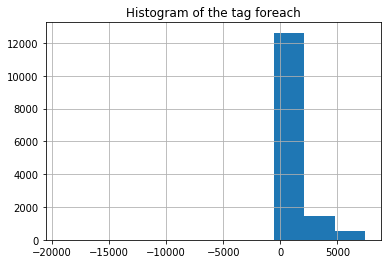

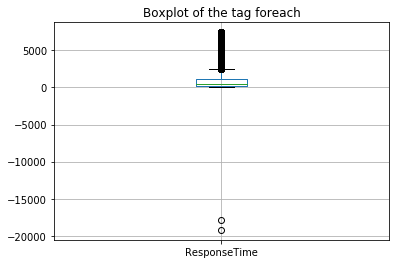

class


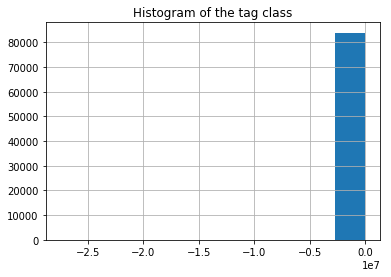

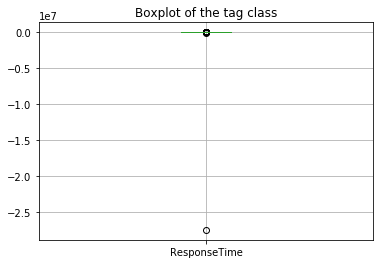

formatting


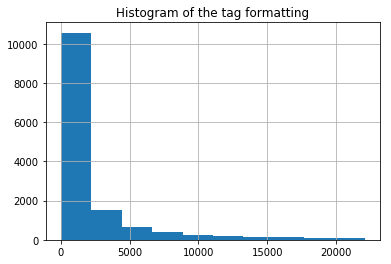

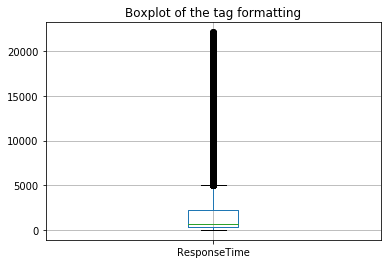

path


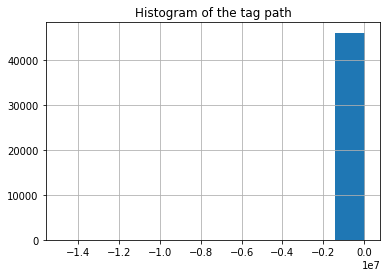

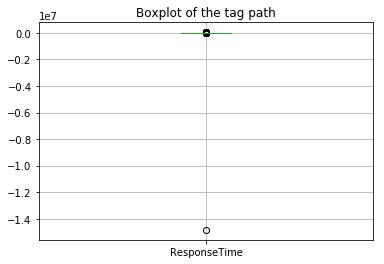

routes


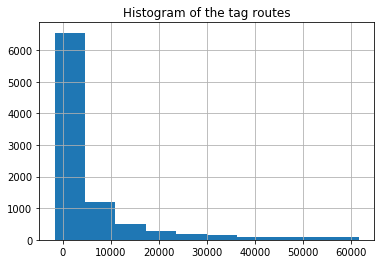

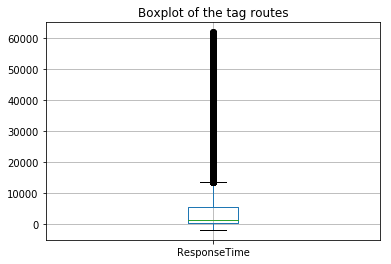

cron


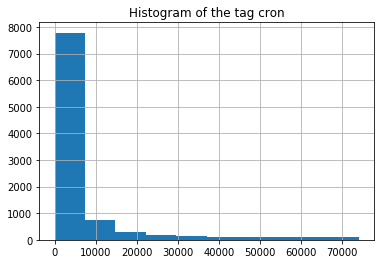

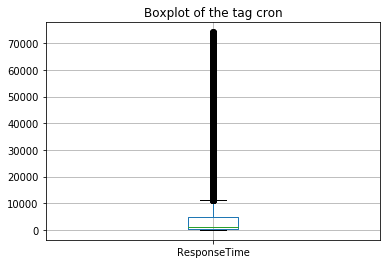

ruby-on-rails-3


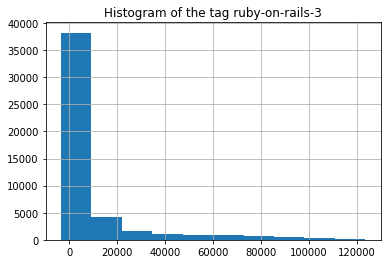

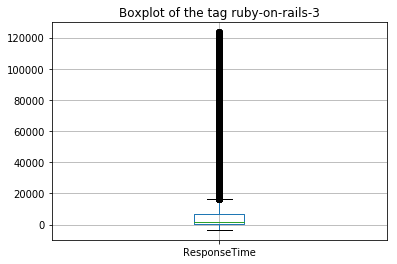

stream


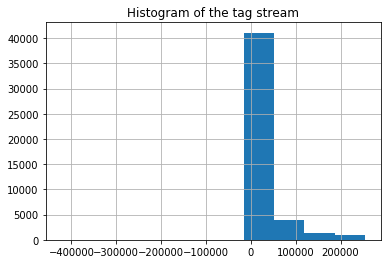

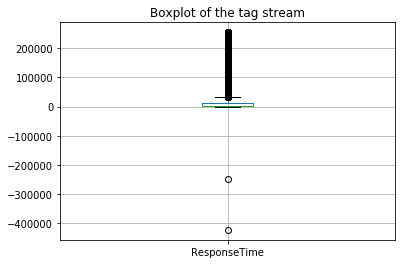

width


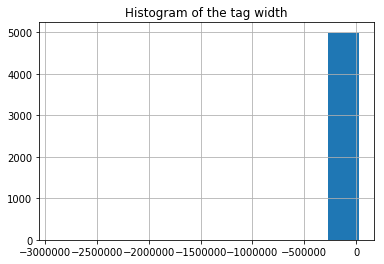

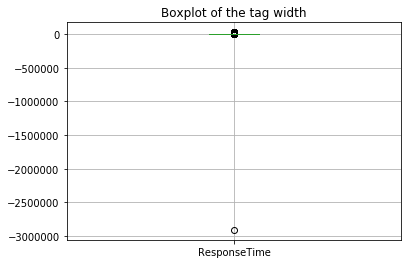

width


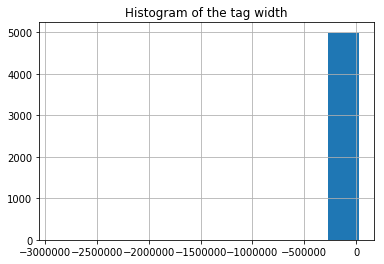

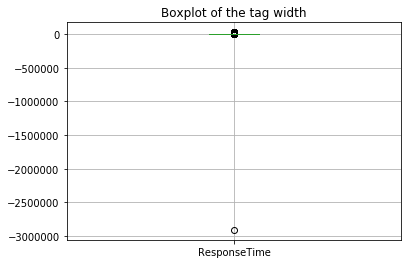

In [129]:
# We select the 10 fastest tag by sorting them and taking the smaller mean of ResponseTime
fastest_tag = df.sort_values('ResponseTime')[:10]

# We plot the 10 distribution
for i in fastest_tag['Tags']:
    # Find the question date
    depart_time = file[file.Tags.contains(i)]
    depart_time= depart_time.selectExpr("CreationDate as DepartureDate",'PostTypeId as PostTypeId', 'Id as Id')
    # Find the first answer date
    first_answer_date = file[file.PostTypeId == 2].groupBy("ParentId").agg(min_("CreationDate").alias("FirstAnswerDate"))
    first_answer_date = first_answer_date.selectExpr("ParentId as Id",'FirstAnswerDate as FirstAnswerDate')
    # Join the two features
    tmp = depart_time.join(first_answer_date, on = ['Id'])
    # Create ResponseTime feature
    tmp = tmp.withColumn('ResponseTime', (F.unix_timestamp('FirstAnswerDate', format=timeFmt) - F.unix_timestamp('DepartureDate', format=timeFmt)))
    tmp = tmp.selectExpr("ResponseTime as ResponseTime")
    tmp = tmp.toPandas()
    
    ##Remove the outliers 
    Q1 = np.quantile(tmp.ResponseTime, 0.25)
    Q3 = np.quantile(tmp.ResponseTime, 0.75)
    tmp = tmp[tmp.ResponseTime < Q3 + 3*(Q3 - Q1)]
    
    # Plot
    print(i)
    tmp.hist('ResponseTime')
    plt.title('Histogram of the tag ' + i)
    plt.show()
    tmp.boxplot(column='ResponseTime')
    plt.title('Boxplot of the tag ' + i)

    plt.show()

**COMMENT**: 

We decide to remove the strong outliers from the data since it was making the lecture of the histograms too difficult (An extreme outlier is $Q3 + 3*(Q3-Q1)$. 

**IMPORTANT NOTE: We are showing here the results compute from the median but only for a subset of 342/1096 since we did not had the time to compute more experiment because of a mistake in the code seen too late. However, before we worked with the mean which was not an adapted statistic to measure the data since there a strong outliers. We should have computed the values for the median in the first which would have given better results. Nevertheless, the only problem is that we did not have the time to correct the plot since they took a massive amount of time to be produced  and we prefered to have uncomplete results instead of partial results... Furthermore, we should have removed the negative values.**

### Task E: What's up with PySpark?
The number of questions asked regarding a specific topic reflect the public’s interest on it. We are interested on the popularity of PySpark. Compute and plot the number of questions with the ```pyspark``` tag for 30-day time intervals. Do you notice any trend over time? Is there any correlation between time and number of questions?


### STEP E.1 - Load Data

In [55]:
posts_parquet = spark.read.parquet( DATA_DIR + "posts.parquet")
posts_parquet.printSchema()

root
 |-- CreationDate: string (nullable = true)
 |-- Id: long (nullable = true)
 |-- ParentId: long (nullable = true)
 |-- PostTypeId: integer (nullable = true)
 |-- Score: integer (nullable = true)
 |-- Tags: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- ViewCount: integer (nullable = true)
 |-- timestamp: timestamp (nullable = true)



### STEP E.2 - Clean Data

In [56]:
# filter for questions (PostTypeId 1) AND pyspark tag
posts_parquet_pyspark = posts_parquet[['CreationDate', 'Tags']]

## implicitly filters for PostTypeId 1 since only questions can have Tags
posts_parquet_pyspark = posts_parquet_pyspark[posts_parquet_pyspark.Tags.contains('pyspark')]

## Cast CreationDate type as timestamp value
from pyspark.sql.functions import unix_timestamp, from_unixtime, from_utc_timestamp
posts_parquet_pyspark = posts_parquet_pyspark.withColumn('timestamp', from_utc_timestamp(posts_parquet_pyspark.CreationDate, "PST"))

posts_parquet_pyspark.show() # preview data sample

+--------------------+--------------------+--------------------+
|        CreationDate|                Tags|           timestamp|
+--------------------+--------------------+--------------------+
|2017-08-17T16:40:...|<python><apache-s...|2017-08-17 09:40:...|
|2017-08-17T18:15:...|<sql><apache-spar...|2017-08-17 11:15:...|
|2017-08-17T20:36:...|<apache-spark><py...|2017-08-17 13:36:...|
|2016-08-03T08:10:...|<pyspark><apache-...|2016-08-03 01:10:...|
|2016-08-03T08:22:...|<pyspark><pyspark...|2016-08-03 01:22:...|
|2016-08-03T12:06:...|<scala><apache-sp...|2016-08-03 05:06:...|
|2016-08-03T12:19:...|<python><apache-s...|2016-08-03 05:19:...|
|2016-08-03T16:34:...|<python><apache-s...|2016-08-03 09:34:...|
|2016-08-03T18:48:...|<apache-spark><py...|2016-08-03 11:48:...|
|2016-08-03T18:52:...|<python><apache-s...|2016-08-03 11:52:...|
|2016-08-03T20:00:...|<pyspark><apache-...|2016-08-03 13:00:...|
|2016-08-04T03:11:...|<python><apache-s...|2016-08-03 20:11:...|
|2016-08-04T10:20:...|<py

### STEP E.3: Compute the number of questions with the pyspark tag for 30-day time intervals
In order to answer this question our group decided to take advantage of the slidding window function coded in the spark library. This made it possible to create several 30-day intervals. Similarly to task A, the data that we are dealing with look contains the following information: 

In [57]:
posts_parquet_pyspark.printSchema()

root
 |-- CreationDate: string (nullable = true)
 |-- Tags: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)



In [58]:
from pyspark.sql.functions import window
pyspark_30days = posts_parquet_pyspark.groupBy(window("timestamp", "30 days")).count() ## use Spark library function window

The window function enables us to get 30 days time intervals in each row of the panda dataframe. This data is stored like this: 

In [59]:
pyspark_30days.head(3)

[Row(window=Row(start=datetime.datetime(2016, 1, 30, 1, 0), end=datetime.datetime(2016, 2, 29, 1, 0)), count=173),
 Row(window=Row(start=datetime.datetime(2014, 4, 10, 2, 0), end=datetime.datetime(2014, 5, 10, 2, 0)), count=1),
 Row(window=Row(start=datetime.datetime(2016, 11, 25, 1, 0), end=datetime.datetime(2016, 12, 25, 1, 0)), count=253)]

### STEP E.4 : Plot the number of questions with the pyspark tag for 30-day time intervals

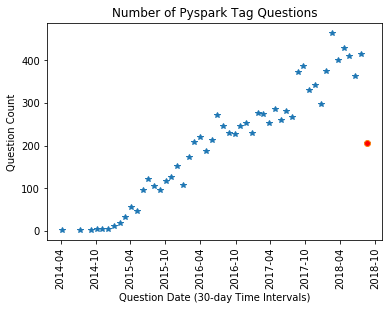

In [60]:
## this requires pandas
## move to a pandas dataframe
pyspark_df = pyspark_30days[['window.start', 'window.end', 'count']].toPandas()

## then visualize with pyplot
# graph by window start time
date = pyspark_df['start']
count = pyspark_df['count']

# mark last data point as outlier in red
outlier = pyspark_df.loc[pyspark_df['start'] == date.max()]
outlier_x = outlier["start"]
outlier_y = outlier["count"]

# plot data
plt.plot(date, count, "*")
plt.plot(outlier_x, outlier_y, "o", mfc = 'r')

# label graph
plt.title("Number of Pyspark Tag Questions")
plt.xlabel('Question Date (30-day Time Intervals)')
plt.ylabel('Question Count')
plt.xticks(rotation='vertical')
plt.show()

#### Do you notice any trend over time? Is there any correlation between time and number of questions?
ANSWER: There is an increasing trend in the number of Stack Overflow questions over time that include the 'pyspark' tag. The number of 'pyspark' questions were close to 0 before 2015, before growing linearly from 2015 to mid-2018. Thus, for the majority of the time represented by our dataset, it appears that users on Stack Overflow have steadily gained interest in learning more about 'pyspark'.

Although the last datapoint in our plot (marked by the red circle in the graph above) represents a drop in the number of 'pyspark' questions, this datapoint is an outlier that can be explained by the fact that the counting of questions is grouped in 30-day intervals, and the dataset is incomplete for some of the remaining days of the last 30-day interval. Thus the count of the last datapoint is deceptively low and can be ignored when commenting on data trends.